In [34]:
import pandas as pd 

import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [26]:
nao_sobreviventes = df[df["Survived"] ==0]
media_tarifa_mortos = nao_sobreviventes.groupby(["Sex", "Pclass"])["Fare"].mean()

print(media_tarifa_mortos)

#media das tarifas dos mortos por sexo e class.

Sex     Pclass
female  1         110.604167
        2          18.250000
        3          19.773093
male    1          62.894910
        2          19.488965
        3          12.204469
Name: Fare, dtype: float64


In [27]:
sobreviventes = df[df["Survived"] ==1]

media_tarifa_vivos = sobreviventes.groupby(["Sex", "Pclass"])["Fare"].mean()
# média da tarifa (Fare) dos sobreviventes por sexo e classe.

print(media_tarifa_vivos)



Sex     Pclass
female  1         105.978159
        2          22.288989
        3          12.464526
male    1          74.637320
        2          21.095100
        3          15.579696
Name: Fare, dtype: float64


In [28]:
media_tarifa_mortos 
media_tarifa_vivos

comparacao_media = pd.concat([media_tarifa_vivos, media_tarifa_mortos], axis=1)
comparacao_media.columns = ["media_tarifa_vivos", "media_tarifa_mortos"]

resultado = (media_tarifa_vivos - media_tarifa_mortos) / media_tarifa_mortos * 100

print(resultado)

Sex     Pclass
female  1         -4.182489
        2         22.131444
        3        -36.962182
male    1         18.669888
        2          8.241254
        3         27.655659
Name: Fare, dtype: float64


Text(0, 0.5, 'Sobrevivencia %')

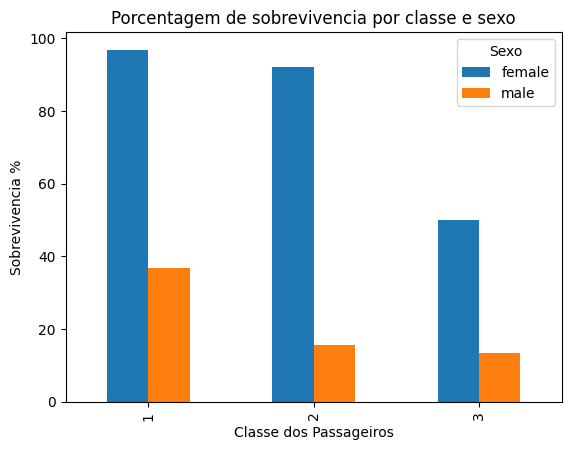

In [45]:
percentual_sobrevivencia = df.groupby(["Pclass", "Sex"])["Survived"].mean() * 100

tabela = percentual_sobrevivencia.unstack()

tabela.plot(kind="bar")
plt.title("Porcentagem de sobrevivencia por classe e sexo")
plt.legend(title= "Sexo")
plt.xlabel("Classe dos Passageiros")
plt.ylabel("Sobrevivencia %")